In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df=pd.read_csv("C:/Users/konstantin.moeller/python/ki_in_mrt/annotations/coco/output.csv")
df['scan']=df['file_name'].str.split('/',1).str[0]
df['scan_art']=df['file_name'].str.extract(r'\d{4,6}_(T\d{1}.{1,8})\/')
df['patient']=df['file_name'].str.extract(r'(\d{4}_\d{4,6})')
df['frame']=df['file_name'].str.split('/').str[1]

In [3]:
df

file_name    id              annotation  \
0          0842_66613_T1_DOR/0000000.png     0                 healthy   
1          0842_66613_T1_DOR/0000001.png     1                 healthy   
2          0842_66613_T1_DOR/0000002.png     2                 healthy   
3          0842_66613_T1_DOR/0000003.png     3                 healthy   
4          0842_66613_T1_DOR/0000004.png     4               ventricle   
...                                  ...   ...                     ...   
9063  0828_413825_T1_DOR_GAD/0000011.png  3648  primary lesion polygon   
9064  0828_413825_T1_DOR_GAD/0000011.png  3648   pathological contrast   
9065  0828_413825_T1_DOR_GAD/0000012.png  3649         mass effect box   
9066  0828_413825_T1_DOR_GAD/0000013.png  3650                 healthy   
9067  0828_413825_T1_DOR_GAD/0000014.png  3651                 healthy   

            attributes  iscrowd  \
0                  NaN      NaN   
1                  NaN      NaN   
2                  NaN      NaN   
3                  NaN      NaN   
4           ['fourth']      0.0   
...                ...      ...   
9063               NaN      1.0   
9064               NaN      1.0   
9065  ['midlineshift']      0.0   
9066               NaN      NaN   
9067               NaN      NaN   

                                           segmentation       area  \
0                                                   NaN        NaN   
1                                                   NaN        NaN   
2                                                   NaN        NaN   
3                                                   NaN        NaN   
4     [[140.63, 230.51, 138.79, 242.4, 137.48, 243.7...   90.76905   
...                                                 ...        ...   
9063  {'counts': [30071, 3, 252, 6, 248, 9, 222, 7, ...    0.00000   
9064  {'counts': [30326, 3, 252, 6, 248, 10, 245, 12...    0.00000   
9065  [[126.53, 95.58, 140.47, 95.58, 140.47, 131.4,...  499.33080   
9066                                                NaN        NaN   
9067                                                NaN        NaN   

                                                   bbox  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4     [130.1, 228.0, 10.710000000000008, 15.71000000...   
...                                                 ...   
9063                                  [117, 84, 17, 44]   
9064                                  [118, 85, 14, 42]   
9065  [126.53, 95.58, 13.939999999999998, 35.8200000...   
9066                                                NaN   
9067                                                NaN   

                                                  extra  height  width  \
0                                                   NaN     256    256   
1                                                   NaN     256    256   
2                                                   NaN     256    256   
3                                                   NaN     256    256   
4       {'instance_id': 1378, 'attributes': ['fourth']}     256    256   
...                                                 ...     ...    ...   
9063                              {'instance_id': 2185}     256    256   
9064                              {'instance_id': 2184}     256    256   
9065  {'instance_id': 2186, 'attributes': ['midlines...     256    256   
9066                                                NaN     256    256   
9067                                                NaN     256    256   

                                             darwin_url  \
0     https://darwin.v7labs.com/api/videos/3617015/f...   
1     https://darwin.v7labs.com/api/videos/3617015/f...   
2     https://darwin.v7labs.com/api/videos/3617015/f...   
3     https://darwin.v7labs.com/api/videos/361

In [4]:
df_image_count=pd.DataFrame(df['patient'].value_counts())
df_image_count

patient
0844_415011      511
0833_421072      440
0845_44993       413
0821_456610      410
0846_423127      392
0841_409853      387
0850_427622      353
0822_451573      338
0832_418676      328
0843_68448       317
0823_467568      303
0835_424987      302
0828_413825      276
0825_65801       263
0827_31459       257
0852_427134      257
0840_424906      256
0831_418146      248
0824_41740       245
0826_53881       234
0851_427388      232
0868_421508      227
0839_69912       221
0842_66613       218
0838_402472      210
0836_51633       209
0834_423309      206
0856_433981      201
0872_431019      156
0857_39211       109
0871_61851       108
0848_423626      108
0837_406837       86
0865_61851        69
0870_30786        65
0867_461560       43
0861_48710        36
0849_423622       34

In [5]:
df_new=df[['patient','scan_art','scan', 'frame','file_name', 'annotation', 'attributes']]
df_new

patient    scan_art                    scan        frame  \
0      0842_66613      T1_DOR       0842_66613_T1_DOR  0000000.png   
1      0842_66613      T1_DOR       0842_66613_T1_DOR  0000001.png   
2      0842_66613      T1_DOR       0842_66613_T1_DOR  0000002.png   
3      0842_66613      T1_DOR       0842_66613_T1_DOR  0000003.png   
4      0842_66613      T1_DOR       0842_66613_T1_DOR  0000004.png   
...           ...         ...                     ...          ...   
9063  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000011.png   
9064  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000011.png   
9065  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000012.png   
9066  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000013.png   
9067  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000014.png   

                               file_name              annotation  \
0          0842_66613_T1_DOR/0000000.png                 healthy   
1          0842_66613_T1_DOR/0000001.png                 healthy   
2          0842_66613_T1_DOR/0000002.png                 healthy   
3          0842_66613_T1_DOR/0000003.png                 healthy   
4          0842_66613_T1_DOR/0000004.png               ventricle   
...                                  ...                     ...   
9063  0828_413825_T1_DOR_GAD/0000011.png  primary lesion polygon   
9064  0828_413825_T1_DOR_GAD/0000011.png   pathological contrast   
9065  0828_413825_T1_DOR_GAD/0000012.png         mass effect box   
9066  0828_413825_T1_DOR_GAD/0000013.png                 healthy   
9067  0828_413825_T1_DOR_GAD/0000014.png                 healthy   

            attributes  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4           ['fourth']  
...                ...  
9063               NaN  
9064               NaN  
9065  ['midlineshift']  
9066               NaN  
9067               NaN  

[9068 rows x 7 columns]

In [6]:
df_new['annotation'].value_counts()

ventricle                   4402
mass effect box             1771
healthy                     1118
primary lesion polygon       683
brainedema                   457
pathological contrast        392
primary lesion box           167
pathological signal void      71
mass effect polygon            7
Name: annotation, dtype: int64

In [7]:
df_no_ven=df_new[df_new['annotation']!='ventricle'].reset_index(drop=True)
df_no_ven

patient    scan_art                    scan        frame  \
0      0842_66613      T1_DOR       0842_66613_T1_DOR  0000000.png   
1      0842_66613      T1_DOR       0842_66613_T1_DOR  0000001.png   
2      0842_66613      T1_DOR       0842_66613_T1_DOR  0000002.png   
3      0842_66613      T1_DOR       0842_66613_T1_DOR  0000003.png   
4      0842_66613      T1_DOR       0842_66613_T1_DOR  0000005.png   
...           ...         ...                     ...          ...   
4661  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000011.png   
4662  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000011.png   
4663  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000012.png   
4664  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000013.png   
4665  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000014.png   

                               file_name              annotation  \
0          0842_66613_T1_DOR/0000000.png                 healthy   
1          0842_66613_T1_DOR/0000001.png                 healthy   
2          0842_66613_T1_DOR/0000002.png                 healthy   
3          0842_66613_T1_DOR/0000003.png                 healthy   
4          0842_66613_T1_DOR/0000005.png         mass effect box   
...                                  ...                     ...   
4661  0828_413825_T1_DOR_GAD/0000011.png  primary lesion polygon   
4662  0828_413825_T1_DOR_GAD/0000011.png   pathological contrast   
4663  0828_413825_T1_DOR_GAD/0000012.png         mass effect box   
4664  0828_413825_T1_DOR_GAD/0000013.png                 healthy   
4665  0828_413825_T1_DOR_GAD/0000014.png                 healthy   

            attributes  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
4661               NaN  
4662               NaN  
4663  ['midlineshift']  
4664               NaN  
4665               NaN  

[4666 rows x 7 columns]

In [8]:
df_no_ven['annotation'].value_counts()

mass effect box             1771
healthy                     1118
primary lesion polygon       683
brainedema                   457
pathological contrast        392
primary lesion box           167
pathological signal void      71
mass effect polygon            7
Name: annotation, dtype: int64

In [9]:
df_no_ven['mri_finding']=df_no_ven['annotation'].apply(lambda x: 0 if x=='healthy' else 1)

In [10]:
df_no_ven[df_no_ven['mri_finding']==1]

patient    scan_art                    scan        frame  \
4      0842_66613      T1_DOR       0842_66613_T1_DOR  0000005.png   
5      0842_66613      T1_DOR       0842_66613_T1_DOR  0000006.png   
6      0842_66613      T1_DOR       0842_66613_T1_DOR  0000006.png   
7      0842_66613      T1_DOR       0842_66613_T1_DOR  0000007.png   
8      0842_66613      T1_DOR       0842_66613_T1_DOR  0000007.png   
...           ...         ...                     ...          ...   
4659  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000011.png   
4660  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000011.png   
4661  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000011.png   
4662  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000011.png   
4663  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000012.png   

                               file_name              annotation  \
4          0842_66613_T1_DOR/0000005.png         mass effect box   
5          0842_66613_T1_DOR/0000006.png         mass effect box   
6          0842_66613_T1_DOR/0000006.png         mass effect box   
7          0842_66613_T1_DOR/0000007.png         mass effect box   
8          0842_66613_T1_DOR/0000007.png         mass effect box   
...                                  ...                     ...   
4659  0828_413825_T1_DOR_GAD/0000011.png         mass effect box   
4660  0828_413825_T1_DOR_GAD/0000011.png         mass effect box   
4661  0828_413825_T1_DOR_GAD/0000011.png  primary lesion polygon   
4662  0828_413825_T1_DOR_GAD/0000011.png   pathological contrast   
4663  0828_413825_T1_DOR_GAD/0000012.png         mass effect box   

            attributes  mri_finding  
4                  NaN            1  
5                  NaN            1  
6                  NaN            1  
7                  NaN            1  
8     ['midlineshift']            1  
...                ...          ...  
4659  ['midlineshift']            1  
4660               NaN            1  
4661               NaN            1  
4662               NaN            1  
4663  ['midlineshift']            1  

[3548 rows x 8 columns]

In [11]:
df_no_ven['mri_finding'].value_counts()

1    3548
0    1118
Name: mri_finding, dtype: int64

In [12]:
df_no_ven=df_no_ven.drop_duplicates(subset=['file_name'])

In [13]:
df_no_ven['mri_finding'].value_counts()

1    1399
0    1118
Name: mri_finding, dtype: int64

In [14]:
df_no_ven['scan_art'].value_counts()

T1_TRA_GAD    485
T1_TRA        430
T1_DOR_GAD    302
T2_TRA        301
T1_DOR        232
T2_SAG        229
T1_SAG_GAD    178
T1_SAG         14
T2_DOR         13
Name: scan_art, dtype: int64

In [15]:
df_no_ven[df_no_ven['scan_art']=='T2_DOR']

patient scan_art                scan        frame  \
1658  0821_456610   T2_DOR  0821_456610_T2_DOR  0000000.png   
1659  0821_456610   T2_DOR  0821_456610_T2_DOR  0000001.png   
1660  0821_456610   T2_DOR  0821_456610_T2_DOR  0000002.png   
1661  0821_456610   T2_DOR  0821_456610_T2_DOR  0000003.png   
1662  0821_456610   T2_DOR  0821_456610_T2_DOR  0000005.png   
1665  0821_456610   T2_DOR  0821_456610_T2_DOR  0000006.png   
1669  0821_456610   T2_DOR  0821_456610_T2_DOR  0000007.png   
1674  0821_456610   T2_DOR  0821_456610_T2_DOR  0000008.png   
1678  0821_456610   T2_DOR  0821_456610_T2_DOR  0000009.png   
1680  0821_456610   T2_DOR  0821_456610_T2_DOR  0000010.png   
1681  0821_456610   T2_DOR  0821_456610_T2_DOR  0000012.png   
1682  0821_456610   T2_DOR  0821_456610_T2_DOR  0000013.png   
1683  0821_456610   T2_DOR  0821_456610_T2_DOR  0000014.png   

                           file_name       annotation        attributes  \
1658  0821_456610_T2_DOR/0000000.png          healthy               NaN   
1659  0821_456610_T2_DOR/0000001.png          healthy               NaN   
1660  0821_456610_T2_DOR/0000002.png          healthy               NaN   
1661  0821_456610_T2_DOR/0000003.png          healthy               NaN   
1662  0821_456610_T2_DOR/0000005.png  mass effect box               NaN   
1665  0821_456610_T2_DOR/0000006.png  mass effect box               NaN   
1669  0821_456610_T2_DOR/0000007.png  mass effect box               NaN   
1674  0821_456610_T2_DOR/0000008.png  mass effect box               NaN   
1678  0821_456610_T2_DOR/0000009.png  mass effect box  ['midlineshift']   
1680  0821_456610_T2_DOR/0000010.png  mass effect box               NaN   
1681  0821_456610_T2_DOR/0000012.png          healthy               NaN   
1682  0821_456610_T2_DOR/0000013.png          healthy               NaN   
1683  0821_456610_T2_DOR/0000014.png          healthy               NaN   

      mri_finding  
1658            0  
1659            0  
1660            0  
1661            0  
1662            1  
1665            1  
1669            1  
1674            1  
1678            1  
1680            1  
1681            0  
1682            0  
1683            0

In [16]:
df_no_ven[df_no_ven['scan_art']=='T1_SAG']

patient scan_art                scan        frame  \
1684  0821_456610   T1_SAG  0821_456610_T1_SAG  0000000.png   
1685  0821_456610   T1_SAG  0821_456610_T1_SAG  0000001.png   
1686  0821_456610   T1_SAG  0821_456610_T1_SAG  0000002.png   
1687  0821_456610   T1_SAG  0821_456610_T1_SAG  0000003.png   
1688  0821_456610   T1_SAG  0821_456610_T1_SAG  0000006.png   
1691  0821_456610   T1_SAG  0821_456610_T1_SAG  0000007.png   
1694  0821_456610   T1_SAG  0821_456610_T1_SAG  0000008.png   
1697  0821_456610   T1_SAG  0821_456610_T1_SAG  0000009.png   
1700  0821_456610   T1_SAG  0821_456610_T1_SAG  0000010.png   
1701  0821_456610   T1_SAG  0821_456610_T1_SAG  0000011.png   
1702  0821_456610   T1_SAG  0821_456610_T1_SAG  0000014.png   
1703  0821_456610   T1_SAG  0821_456610_T1_SAG  0000015.png   
1704  0821_456610   T1_SAG  0821_456610_T1_SAG  0000016.png   
1705  0821_456610   T1_SAG  0821_456610_T1_SAG  0000017.png   

                           file_name       annotation attributes  mri_finding  
1684  0821_456610_T1_SAG/0000000.png          healthy        NaN            0  
1685  0821_456610_T1_SAG/0000001.png          healthy        NaN            0  
1686  0821_456610_T1_SAG/0000002.png          healthy        NaN            0  
1687  0821_456610_T1_SAG/0000003.png          healthy        NaN            0  
1688  0821_456610_T1_SAG/0000006.png  mass effect box        NaN            1  
1691  0821_456610_T1_SAG/0000007.png  mass effect box        NaN            1  
1694  0821_456610_T1_SAG/0000008.png  mass effect box        NaN            1  
1697  0821_456610_T1_SAG/0000009.png  mass effect box        NaN            1  
1700  0821_456610_T1_SAG/0000010.png  mass effect box        NaN            1  
1701  0821_456610_T1_SAG/0000011.png  mass effect box        NaN            1  
1702  0821_456610_T1_SAG/0000014.png          healthy        NaN            0  
1703  0821_456610_T1_SAG/0000015.png          healthy        NaN            0  
1704  0821_456610_T1_SAG/0000016.png          healthy        NaN            0  
1705  0821_456610_T1_SAG/0000017.png          healthy        NaN            0

In [17]:
df_no_ven[df_no_ven['mri_finding']==0]['frame'].value_counts().sort_index(ascending=False).plot(kind='barh', title='Verteilung der Frames ohne Krankheit')

<AxesSubplot:title={'center':'Verteilung der Frames ohne Krankheit'}>

<AxesSubplot:title={'center':'Verteilung der Frames mit Krankheit'}>

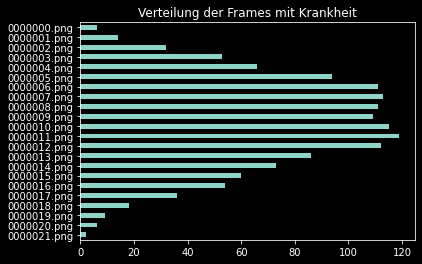

In [18]:
df_no_ven[df_no_ven['mri_finding']==1]['frame'].value_counts().sort_index(ascending=False).plot(kind='barh', title='Verteilung der Frames mit Krankheit')

In [19]:
df_no_ven

patient    scan_art                    scan        frame  \
0      0842_66613      T1_DOR       0842_66613_T1_DOR  0000000.png   
1      0842_66613      T1_DOR       0842_66613_T1_DOR  0000001.png   
2      0842_66613      T1_DOR       0842_66613_T1_DOR  0000002.png   
3      0842_66613      T1_DOR       0842_66613_T1_DOR  0000003.png   
4      0842_66613      T1_DOR       0842_66613_T1_DOR  0000005.png   
...           ...         ...                     ...          ...   
4655  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000010.png   
4659  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000011.png   
4663  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000012.png   
4664  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000013.png   
4665  0828_413825  T1_DOR_GAD  0828_413825_T1_DOR_GAD  0000014.png   

                               file_name       annotation        attributes  \
0          0842_66613_T1_DOR/0000000.png          healthy               NaN   
1          0842_66613_T1_DOR/0000001.png          healthy               NaN   
2          0842_66613_T1_DOR/0000002.png          healthy               NaN   
3          0842_66613_T1_DOR/0000003.png          healthy               NaN   
4          0842_66613_T1_DOR/0000005.png  mass effect box               NaN   
...                                  ...              ...               ...   
4655  0828_413825_T1_DOR_GAD/0000010.png  mass effect box  ['midlineshift']   
4659  0828_413825_T1_DOR_GAD/0000011.png  mass effect box  ['midlineshift']   
4663  0828_413825_T1_DOR_GAD/0000012.png  mass effect box  ['midlineshift']   
4664  0828_413825_T1_DOR_GAD/0000013.png          healthy               NaN   
4665  0828_413825_T1_DOR_GAD/0000014.png          healthy               NaN   

      mri_finding  
0               0  
1               0  
2               0  
3               0  
4               1  
...           ...  
4655            1  
4659            1  
4663            1  
4664            0  
4665            0  

[2517 rows x 8 columns]

In [20]:
df_no_ven=df_no_ven[df_no_ven['mri_finding']==1]

In [21]:
df_no_ven.to_csv('kranke_patiencen.csv', index=False)